## 四阶龙格库塔法

### 第一次尝试

$$\left\{\begin{matrix}\dot{x}=\sigma (y-x) \\ \dot{y} = (\mu-z)x-y \\ \dot{z} = xy - \rho z \end{matrix} \right.$$

$$ x(0)=1 \\  y(0) = 2 \\ z(0) = 3 \\ \sigma=10 \\ \mu=28 \\ \rho=8/3$$

C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:22: RuntimeWarning: overflow encountered in double_scalars
  k32 = (x[i] + 1 / 2 * h * k11) * (y[i] + 1 / 2 * h * k21) - r * (z[i] + 1 / 2 * h * k31)
C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:26: RuntimeWarning: overflow encountered in double_scalars
  k33 = (x[i] + h / 2 * k12) * (y[i] + h / 2 * k22) - r * (z[i] + 1 / 2 * h * k32)
C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:33: RuntimeWarning: invalid value encountered in double_scalars
  yn = y[i] + h / 6 * (k21 + 2 * k22 + 2 * k23 + k24)
C:\Users\YVYIKAI\AppData\Local\Temp/ipykernel_24176/2268245166.py:34: RuntimeWarning: invalid value encountered in double_scalars
  zn = z[i] + h / 6 * (k31 + 2 * k32 + 2 * k33 + k34)


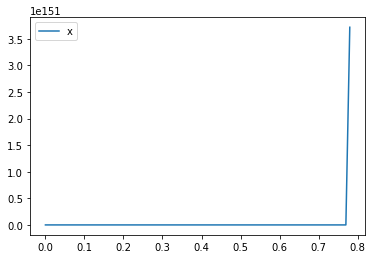

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1], dtype=np.float64)
y = np.array([2], dtype=np.float64)
z = np.array([3], dtype=np.float64)
X = np.array([[2], [1]])  # 给定初始值

s = 10.0
m = 28.0
r = 8 / 3
h = 0.01  # 步长
t = np.arange(0, 10, h)  # 仿真时间

for i, _ in enumerate(t):
    k11 = s * (x[i] - y[i])
    k21 = (m - z[i]) - y[i]
    k31 = x[i] * y[i] - r * z[i]

    k12 = s * ((x[i] + 1 / 2 * h * k11) - (y[i] + 1 / 2 * h * k21))
    k22 = (m - z[i] + 1 / 2 * h * k31) - (y[i] + 1 / 2 * h * k21)
    k32 = (x[i] + 1 / 2 * h * k11) * (y[i] + 1 / 2 * h * k21) - r * (z[i] + 1 / 2 * h * k31)

    k13 = s * ((x[i] + 1 / 2 * h * k12) - (y[i] + h / 2 * k22))
    k23 = (m - (z[i] + h / 2 * k32)) - (y[i] + 1 / 2 * h * k22)
    k33 = (x[i] + h / 2 * k12) * (y[i] + h / 2 * k22) - r * (z[i] + 1 / 2 * h * k32)

    k14 = s * ((x[i] + 1 / 2 * h * k13) - (y[i] + h / 2 * k23))
    k24 = (m - (z[i] + h / 2 * k33)) - (y[i] + 1 / 2 * h * k23)
    k34 = (x[i] + h / 2 * k13) * (y[i] + h / 2 * k23) - r * (z[i] + 1 / 2 * h * k33)

    xn = x[i] + h / 6 * (k11 + 2 * k12 + 2 * k13 + k14)
    yn = y[i] + h / 6 * (k21 + 2 * k22 + 2 * k23 + k24)
    zn = z[i] + h / 6 * (k31 + 2 * k32 + 2 * k33 + k34)
    #     print(xn)
    x = np.append(x, xn)
    y = np.append(y, yn)
    z = np.append(z, zn)
#     print(x)

x1 = y.copy()
x1 = np.array(x1)
x = np.array(x)
x2 = x1 - 1.1 * x1 + 3.0 * x
plt.plot(t, x2[:-1], label='x')
plt.legend()
plt.show()

In [ ]:
# 这个似乎是有问题的，但不知道错在哪了

### 四阶龙格库塔法的第二次尝试
$$ \dot{x} = y + 3z +sin(5t)\\ \dot{y} = x+cos(t) \\ \dot{z} = x+z -3cos(3t)sin(4t) \\ 其中t\in[0, 1] \\ x(0)=y(0)=z(0) = 1$$
这个没问题

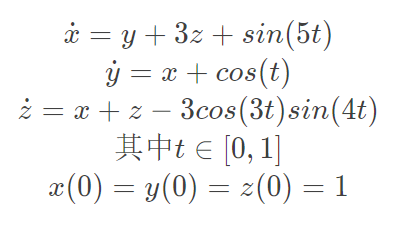
这个没问题

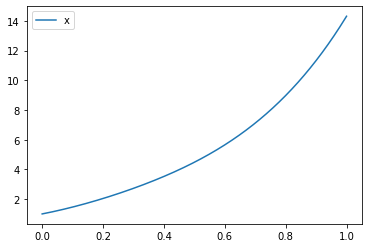

In [44]:
import numpy as np
import matplotlib.pyplot as plt

h = 1e-5  # 步长
t = np.arange(0, 1, h)
N = len(t)

x = np.ones(N)
y = np.ones(N)
z = np.ones(N)


for i, _ in enumerate(t[:-1]):
    x_n = x[i]
    y_n = y[i]
    z_n = z[i]
    t_n = t[i]

    kx1 = y_n + 3 * z_n + np.sin(5*t_n)
    ky1 = x_n + np.cos(t_n)
    kz1 = x_n + z_n - 3 * np.cos(3*t_n) * np.sin(4*t_n)

    kx2=(y_n+ky1*h/2)+3*(z_n+kz1*h/2)+np.sin(5*(t_n+h/2))
    ky2=(x_n+kx1*h/2)+np.cos(t_n+h/2)
    kz2=(x_n+kx1*h/2)+(z_n+kz1*h/2)-3*np.cos(3*(t_n+h/2))*np.sin(4*(t_n+h/2))
    
    kx3=(y_n+ky2*h/2)+3*(z_n+kz2*h/2)+np.sin(5*(t_n+h/2))
    ky3=(x_n+kx2*h/2)+np.cos(t_n+h/2)
    kz3=(x_n+kx2*h/2)+(z_n+kz2*h/2)-3*np.cos(3*(t_n+h/2))*np.sin(4*(t_n+h/2))
    
    kx4=(y_n+ky3*h)+3*(z_n+kz3*h)+np.sin(5*(t_n+h))
    ky4=(x_n+kx3*h)+np.cos(t_n+h)
    kz4=(x_n+kx3*h)+(z_n+kz3*h)-3*np.cos(3*(t_n+h))*np.sin(4*(t_n+h))
    
    x[i+1]=x_n+h/6*(kx1+2*kx2+2*kx3+kx4)
    y[i+1]=y_n+h/6*(ky1+2*ky2+2*ky3+ky4)
    z[i+1]=z_n+h/6*(kz1+2*kz2+2*kz3+kz4)

plt.plot(t, x, label='x')
# plt.plot(t, y, label='y')
# plt.plot(t, z, label='z')
plt.legend()
plt.show()
# print(x)

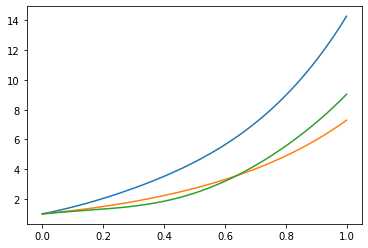

Wall time: 1.06 s


In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt

h = 1e-3  # 步长
t = np.arange(0, 1, h)
# print(t)
x = np.ones(len(t))
y = np.ones(len(t))
z = np.ones(len(t))  # 初始值设为1

for i, t_n in enumerate(t[: -1]):
    x_n = x[i]
    y_n = y[i]
    z_n = z[i]
    # t_n = t[i]
    
    kx1 = y_n + 3 * z_n + np.sin(5*t_n)
    ky1 = x_n + np.cos(t_n)
    kz1 = x_n + z_n - 3 * np.cos(3*t_n) * np.sin(4*t_n)
    
    kx2 = (y_n+h/2*ky1) + 3 * (z_n+h/2*kz1) + np.sin(5*(t_n+h/2))
    ky2 = (x_n+h/2*kx1) + np.cos(t_n+h/2)
    kz2 = (x_n+h/2*kx1) + (z_n+h/2*kz1) - 3 * np.cos(3*(t_n+h/2)) * np.sin(4*(t_n+h/2))
    
    kx3 = (y_n+h/2*ky2) + 3 * (z_n+h/2*kz2) + np.sin(5*(t_n+h/2))
    ky3 = (x_n+h/2*kx2) + np.cos(t_n+h/2)
    kz3 = (x_n+h/2*kx2) + (z_n+h/2*kz2) - 3 * np.cos(3*(t_n+h/2)) * np.sin(4*(t_n+h/2))
    
    kx4 = (y_n+h*ky3) + 3 * (z_n+h*kz3) + np.sin(5*(t_n+h))
    ky4 = (x_n+h*kx3) + np.cos(t_n+h)
    kz4 = (x_n+h*kx3) + (z_n+h*kz3) - 3 * np.cos(3*(t_n+h)) * np.sin(4*(t_n+h))
    
    x[i+1] = x_n + h / 6 * (kx1+2*kx2+2*kx3+kx4)
    y[i+1] = y_n + h / 6 * (ky1+2*ky2+2*ky3+ky4)
    z[i+1] = z_n + h / 6 * (kz1+2*kz2+2*kz3+kz4)
    
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.plot(t, z, label='z')
plt.show()